/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


MMM Found
AXP Found
AAPL Found
BA Found
CAT Found
CVX Found
CSCO Found
KO Found
DIS Found
XOM Found
GS Found
HD Found
IBM Found
INTC Found
JNJ Found
JPM Found
MCD Found
MRK Found
MSFT Found
NKE Found
PFE Found
PG Found
TRV Found
UTX Found
UNH Found
VZ Found
V Found
WMT Found
WBA Found
Dow Found
CPU times: user 70.7 ms, sys: 126 µs, total: 70.8 ms
Wall time: 71 ms


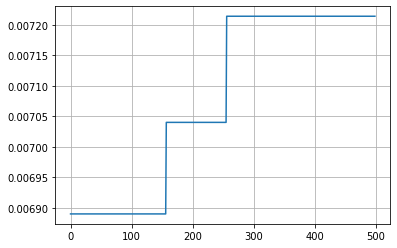

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt

train = pd.read_csv('train.csv')
train

df = pd.DataFrame()

for name in train.columns[1:]:   # dr is pandas data_reader
    
    try:
        print(name, "Found")
        new = dr.get_data_yahoo(name, start = '2010-1-4')[['Adj Close']]
        new = new.rename(columns={'Adj Close':name})
        df= pd.concat([df,new], axis=1)
    except:
        print(name, "Not Found")
        pass

df.head(10)
x = dr.get_data_yahoo('Dow')[['Adj Close']]
x = x.rename(columns = {'Adj Close':'Dow'})
df = df.drop('Dow', axis = 1) # Dropped the Dow column
df = pd.concat([df,x], axis = 1)
df.to_csv('DOWJones.csv')
df.diff()
df.shift(-1) / df # Returns
R = np.log(df.shift(-1) / df) # take log of Returns
# Randome choice of 500 chromosomes
Chromosome = [np.random.choice(train.columns[1:], 10, replace = False) for k in range(500)] 
ChromeList = []
for item in Chromosome:
    ChromeList += ['-'.join(item)] # creates the chain of 10 stocks
ChromeList
def Fitness(chromosome, data):      # Fitness function calculates the log return for each chain of 10 stocks
    arr = chromosome.split('-')
    fit = data.T.loc[arr].sum(axis= 0).mean()
    return fit
F = [Fitness(item, train) for item in ChromeList]
F
fit_score = [Fitness(item, train) for item in ChromeList]
index = np.argsort(fit_score)[::-1]
%time Fitness(ChromeList[0], train)
fit_score 
W = np.array(fit_score )/ sum(fit_score)   # probability of proportion with best score
W
sum(W)
# removes duplicates and we substituted the random stock from the other remaining stocks from Dow Jones
parents = np.random.choice(ChromeList, 2, p = W) # Top is mother. Bottom is father
parents
parent0 = parents[0].split('-')[0:5] 
parent1 = parents[0].split('-')[5:10]

overlap = set(parent0) & set(parent1)

if overlap:
    new = np.random.choice(set(train.column[1:]) - overlap, len(overlap))

    for same, diff in zip(overlap, new):
    
    
        parent1.remove(same)
        parent1.remove(diff)
set(parents[0].split('-')[0:5]) & set(parents[0].split('-')[5:10]) # checking for overlap

# PNL
PNL = []
for i in range(500):

    parents = np.random.choice(ChromeList, 2, p=W)

    parent0 = parents[0].split('-')[0:5]
    parent1 = parents[1].split('-')[5:]

    #print('Parent 0: ', parent0)
    #print('Parent 1: ', parent1)

    overlap = set(parent0)&set(parent1)

    #print('Overlap: ', overlap)

    if overlap:

        new = np.random.choice(list(set(train.columns[1:]) - overlap), len(overlap))
        #print('New stocks: ', new)

        for (same, diff) in zip(overlap,new):
            parent1.remove(same)
            parent1.append(diff)

    #print('Parent 0: ', parent0)
    #print('Parent 1: ', parent1)

    newChrome = '-'.join(parent0+parent1)

    #print('Before mutation: ', newChrome)

    #--------------
    i = np.random.randint(0,10)
    tmp = newChrome.split('-').pop(i)
    tmpChrome = newChrome.split('-')
    tmpChrome.remove(tmp)
    tmpChrome.append(np.random.choice(list(set(train.columns[1:]) - set(newChrome.split('-')))))
    newChrome = '-'.join(tmpChrome)

    #print('After mutation: ', newChrome)

    F = np.array(F)
    ChromeList = np.array(ChromeList)

    ind = np.argsort(F)[::-1]
    F = F[ind]
    ChromeList = ChromeList[ind]
    F = F[:-1]
    ChromeList = ChromeList[:-1]
    fit = Fitness(newChrome, train)
    F = np.append(F,fit)
    ChromeList = np.append(ChromeList,newChrome)

    W = np.array(F)/sum(F)

    PNL+=[Fitness(ChromeList[0], train)]

# PNL plot
plt.grid()
plt.plot(PNL)



    
